# Topic modeling
## Abstract

In [ ]:
!pip install gensim
!pip install stop-words
!pip install pyLDAvis


In [1]:

import pandas as pd
import csv

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open(r"E:\Helen\FinalProject_INFO5731\done_for_storing\reformatted_bioRxiv.csv", "r",  newline="", encoding='utf-8') as file:
    df= pd.read_csv(file)
df['abstract']

0      ['word count: 194 22 Text word count: 5168 23 ...
1                                                     []
2      ["Infectious bronchitis (IB) causes significan...
3      ['Background: A novel coronavirus (2019-nCoV) ...
4      ['Faced with the current large-scale public he...
                             ...                        
798    ['15 Current prophylactic and therapeutic stra...
799    ['Extracellular β-amyloid (Aβ) plaque deposits...
800                                                   []
801    ["Human behavior can change the spread of infe...
802    ["Coronaviruses such as the newly discovered v...
Name: abstract, Length: 803, dtype: object

In [4]:
# clean data in 'abstract' column
df['abstract']=df['abstract'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))
df['abstract']=df['abstract'].str.replace('[^\w\s,]','')
df['abstract']=df['abstract'].str.lower()
df['abstract']

<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<ipython-input-4-32d3c309c96c>:3: DeprecationWarning: invalid escape sequence \w
  df['abstract']=df['abstract'].str.replace('[^\w\s,]','')


0      word count text word count authorfunder all ri...
1                                                       
2      infectious bronchitis ib causes significant ec...
3      background a novel coronavirus 2019ncov emerge...
4      faced with the current largescale public healt...
                             ...                        
798    current prophylactic and therapeutic strategie...
799    extracellular βamyloid aβ plaque deposits and ...
800                                                     
801    human behavior can change the spread of infect...
802    coronaviruses such as the newly discovered vir...
Name: abstract, Length: 803, dtype: object

In [9]:
# Topic modeling with LDA and Gensim
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')
stop_plus= ['word', 'count', 'text', 'all', 'right', 'no', 'without', 'abstract', 'no', 'reuse', 'without']

# Create PorterStemmer
p_stemmer = PorterStemmer()
    
# create list of documents
abstract_set=[]
for abstract in df['abstract'].dropna():
    abstract_set.append(abstract)
#print(abstract_set)

# list for tokenized documents in loop
texts = []

# loop through document list
for i in abstract_set:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop + stop_plus]
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
#print(dictionary)    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#print(corpus)
'''
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word = dictionary, passes=30)
#print(ldamodel.print_topics(num_topics=20,num_words=8)
'''

'\n# generate LDA model\nldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word = dictionary, passes=30)\n#print(ldamodel.print_topics(num_topics=20,num_words=8)\n'

In [5]:
for topic in ldamodel.print_topics(num_topics=20,num_words=8):
    print(topic)

(0, '0.014*"structur" + 0.014*"2019ncov" + 0.012*"sequenc" + 0.011*"protein" + 0.011*"use" + 0.010*"coronaviru" + 0.007*"ace2" + 0.007*"drug"')
(1, '0.016*"genom" + 0.007*"gene" + 0.006*"strain" + 0.006*"rna" + 0.006*"annot" + 0.005*"use" + 0.005*"respons" + 0.004*"organ"')
(2, '0.044*"patient" + 0.019*"covid19" + 0.014*"clinic" + 0.013*"case" + 0.012*"sever" + 0.009*"infect" + 0.009*"studi" + 0.009*"sarscov2"')
(3, '0.018*"cell" + 0.008*"ns1" + 0.007*"protein" + 0.007*"preprint" + 0.007*"use" + 0.006*"secret" + 0.006*"frameshift" + 0.006*"infect"')
(4, '0.023*"sequenc" + 0.012*"use" + 0.009*"sampl" + 0.008*"genotyp" + 0.007*"viral" + 0.007*"ibv" + 0.007*"data" + 0.007*"denv"')
(5, '0.019*"case" + 0.016*"estim" + 0.013*"number" + 0.012*"model" + 0.011*"china" + 0.010*"epidem" + 0.010*"time" + 0.009*"infect"')
(6, '0.013*"viral" + 0.010*"viru" + 0.010*"detect" + 0.008*"use" + 0.007*"virus" + 0.006*"host" + 0.006*"sequenc" + 0.006*"protein"')
(7, '0.012*"gene" + 0.007*"sampl" + 0.006*"pe

In [34]:
# Compute Model Perplexity and Coherence Score: This model to judge how good the model performed,
# especially by Coherene score

# Compute Perplexity
print('Perplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_ldamodel = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_ldamodel.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -7.886657205433682

Coherence Score:  0.42866008154770585


In [36]:
# Visualize the first work
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

C:\Users\ngoch\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.059576 -0.121419       1        1  21.575918
19     0.227218 -0.116417       2        1  11.602877
16    -0.027025 -0.114563       3        1   8.967861
15    -0.091684 -0.108732       4        1   8.949234
9      0.132749 -0.063372       5        1   8.299771
1      0.244103  0.078355       6        1   6.014578
12    -0.102789 -0.094241       7        1   5.770845
7     -0.024576 -0.089410       8        1   5.723006
0      0.072855 -0.088391       9        1   4.764500
6     -0.035791 -0.039394      10        1   3.879903
3      0.091438  0.100926      11        1   2.312329
4     -0.034006 -0.026831      12        1   2.179287
8     -0.060043  0.012342      13        1   1.682104
18    -0.089358  0.004831      14        1   1.668634
5      0.105916  0.138731      15        1   1.361778
14    -0.042794  0.095803      16        1   1.339559
2     -0.093617  0.100115      17        1   1.185959
10    -0.066863  0.087316      18        1   1.129605
11    -0.097539  0.079454      19        1   1.117213
17    -0.048619  0.164898      20        1   0.475041, topic_info=     Category        Freq      Term       Total  loglift  logprob
982   Default  614.000000   patient  614.000000  30.0000  30.0000
200   Default  647.000000      case  647.000000  29.0000  29.0000
569   Default  308.000000  2019ncov  308.000000  28.0000  28.0000
953   Default  371.000000   covid19  371.000000  27.0000  27.0000
437   Default  692.000000   protein  692.000000  26.0000  26.0000
...       ...         ...       ...         ...      ...      ...
982   Topic20    2.197814   patient  614.122864  -0.2832  -5.6949
487   Topic20    1.903251       set  119.040436   1.2136  -5.8388
2374  Topic20    1.841800    comput   69.696251   1.7161  -5.8716
953   Topic20    1.962664   covid19  371.941101   0.1051  -5.8080
48    Topic20    1.625986    import  266.440277   0.2505  -5.9962

[1423 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
109        1  0.212785       1
109        2  0.175548       1
109        3  0.058516       1
109        4  0.191506       1
109        5  0.074475       1
...      ...       ...     ...
918       14  0.015839  zoonot
10181     16  0.807429      zt
10501      7  0.864495      ºc
8796       2  0.941848       λ
7972       2  0.889013       τ

[4723 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 20, 17, 16, 10, 2, 13, 8, 1, 7, 4, 5, 9, 19, 6, 15, 3, 11, 12, 18])

In [7]:
sorted= False

In [5]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import logging
import gensim
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [10]:

# Apply Mallet's LDA 
# Problem that I cannot fix
import gensim
import os
from gensim.models.wrappers import LdaMallet


#os.environ.update({'MALLET_HOME':r"C:\new_mallet\mallet\"})
#mallet_path = r'C:\mallet-2.0.8\bin\mallet'
mallet_path = r'C:\mallet2\bin\mallet.bat'

#mallet_path = r"E:\Helen\mallet-2.0.8\bin\mallet"
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=dictionary)


CalledProcessError: Command 'C:\mallet2\bin\mallet.bat import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input C:\Users\ngoch\AppData\Local\Temp\60e98b_corpus.txt --output C:\Users\ngoch\AppData\Local\Temp\60e98b_corpus.mallet' returned non-zero exit status 1.

# KEYWORDS EXTRACTION

In [5]:
# prepare data
# clean data in 'abstract' column
df['abstract']=df['abstract'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))
#df['abstract']=df['abstract'].str.replace('[^\w\s\,]','')
df['abstract']=df['abstract'].str.lower()
df['abstract'][1]

'[]'

# yake

In [9]:
!pip install git+https://github.com/LIAAD/yake

  Cloning https://github.com/LIAAD/yake to c:\users\ngoch\appdata\local\temp\pip-req-build-iy26gdgv
  Created wheel for yake: filename=yake-0.4.2-py2.py3-none-any.whl size=67263 sha256=7958b2cec56aeaf91ca1e8e81316521d2eac6c7d79cd3c0e95c673158b8b3543
  Stored in directory: C:\Users\ngoch\AppData\Local\Temp\pip-ephem-wheel-cache-aff07paj\wheels\be\35\27\e4ebd54b78c1806ed8b0271ce247fcd91e2bedde35889fbc9b
  Created wheel for segtok: filename=segtok-1.5.7-cp37-none-any.whl size=23262 sha256=0f015984d24866b940b3ad63ba012dd9bb08f2234d72de276495ea54199aa4c0
  Stored in directory: C:\Users\ngoch\AppData\Local\pip\Cache\wheels\15\ee\a8\6112173f1386d33eebedb3f73429cfa41a4c3084556bcee254
  Created wheel for jellyfish: filename=jellyfish-0.7.2-cp37-none-any.whl size=10033 sha256=3ab29c4d0a8c027ca0e335f7b861f7e0973870e526b908a640e5b0714d17ad9a
  Stored in directory: C:\Users\ngoch\AppData\Local\pip\Cache\wheels\e8\fe\99\d8fa8f2ef7b82a625b0b77a84d319b0b50693659823c4effb4
Successfully built yake segto

  Running command git clone -q https://github.com/LIAAD/yake 'C:\Users\ngoch\AppData\Local\Temp\pip-req-build-iy26gdgv'


In [6]:
import yake
text=''
for abstr in df['abstract'].dropna():
    text=text+str(abstr)
#print(text)
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(text)

for kw in keywords:
    print(kw)
    
    

('doi biorxiv preprint', 9.780994196268188e-09)
('rna virus infection', 4.393633216224269e-08)
('host cell proteins', 5.0485065640791346e-08)
('respiratory syndrome coronavirus', 5.896818978132291e-08)
('ccby international license', 6.414126790587005e-08)
('severe acute respiratory', 7.071403948787629e-08)
('ccbyncnd international license', 7.946862952330043e-08)
('international license authorfunder', 8.278864170310098e-08)
('host gene expression', 8.956229942977117e-08)
('acute respiratory syndrome', 1.2552642079050932e-07)
('disease dynamics model', 1.4053137651754588e-07)
('rna virus genomes', 1.5631418857152913e-07)
('virus disease case', 1.6486658367969657e-07)
('virus infection diseases', 1.6722334995519062e-07)
('infectious disease outbreaks', 1.7702572600724562e-07)
('coronavirus disease outbreak', 1.8988509264953665e-07)
('respiratory viral infections', 2.0448469147052242e-07)
('viral respiratory infections', 2.0448469147052242e-07)
('ebola virus disease', 2.0658070244167053e-

In [44]:
#with open(r"E:\Helen\str_text.txt", 'w', encoding = 'utf-8') as file:
#    file.write(text)

<_io.TextIOWrapper name='E:\\Helen\\str_text.txt' mode='w' encoding='utf-8'>

In [15]:
language = "en"
max_ngram_size = 3
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 25

custom_kw_extractor = yake.KeywordExtractor(lan=language,  dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)

for kw in keywords:
    print(kw)
print(keyphrases)

('doi biorxiv preprint', 9.780994196268188e-09)
('rna virus infection', 4.393633216224269e-08)
('host cell proteins', 5.0485065640791346e-08)
('respiratory syndrome coronavirus', 5.896818978132291e-08)
('ccby international license', 6.414126790587005e-08)
('severe acute respiratory', 7.071403948787629e-08)
('ccbyncnd international license', 7.946862952330043e-08)
('international license authorfunder', 8.278864170310098e-08)
('host gene expression', 8.956229942977117e-08)
('acute respiratory syndrome', 1.2552642079050932e-07)
('disease dynamics model', 1.4053137651754588e-07)
('rna virus genomes', 1.5631418857152913e-07)
('virus disease case', 1.6486658367969657e-07)
('virus infection diseases', 1.6722334995519062e-07)
('infectious disease outbreaks', 1.7702572600724562e-07)
('coronavirus disease outbreak', 1.8988509264953665e-07)
('respiratory viral infections', 2.0448469147052242e-07)
('viral respiratory infections', 2.0448469147052242e-07)
('ebola virus disease', 2.0658070244167053e-

NameError: name 'extractor' is not defined

Text(0.5, 1.0, 'KEY WORDS OF PAPERS ')

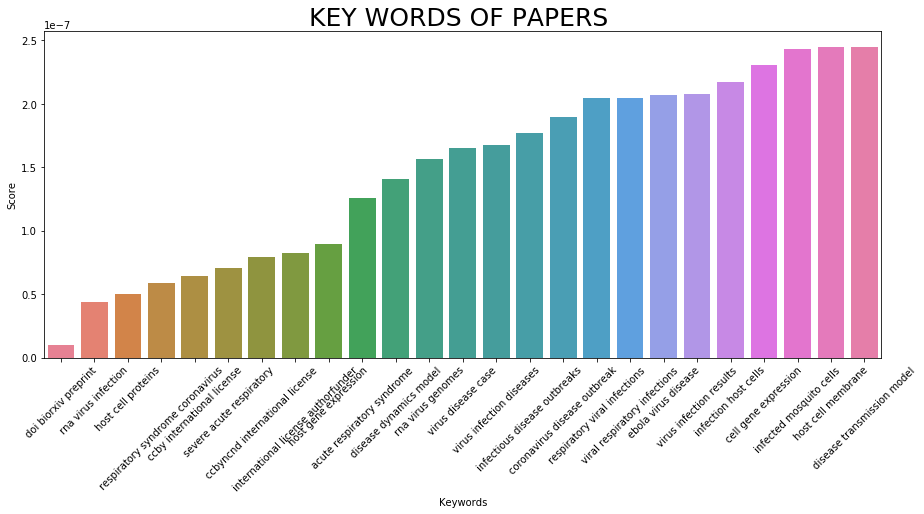

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt 
kws=[kw[0] for kw in keywords]
r=[kw[1] for kw in keywords]
plt.figure(figsize=(15, 6))
sns.barplot(x=kws, y = r , palette= "husl")
plt.xticks(rotation=45)
plt.xlabel('Keywords')
plt.ylabel('Score')
plt.title("KEY WORDS OF PAPERS ", fontsize=25)


In [38]:
from yake.highlight import TextHighlighter

th = TextHighlighter(max_ngram_size = 3)
#th.highlight(text,keywords[1])

# rake
## noted that the peformance of YAKE is much better than RAKE

In [11]:
# With RAKE
from rake_nltk import Rake

rake_object = Rake(stopwords=None,
        punctuations=None,
        language="english", max_length=5,
        min_length=2)

rake_object.extract_keywords_from_text(text)

phrases_ranks = rake_object.get_ranked_phrases_with_scores()

#print(keywords)
'''
for phrase in phrases_ranks:
    if phrase[0] >9 and phrase[0] <=10:
        print (phrase)
'''

NameError: name 'text' is not defined

# PKE 
## Decided to apply YAKE insteads

# Entity Extraction
## Extract Drug, Vaccine...
### Build a Knowledge Graph

In [1]:
# NER with Scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_bc5cdr_md-0.2.4.tar.gz

  Created wheel for en-ner-bc5cdr-md: filename=en_ner_bc5cdr_md-0.2.4-cp37-none-any.whl size=70531469 sha256=65fc70cf2bd9d282e781f596c39aecadc3eb03d45a510efa875d76b84dcb08b3
  Stored in directory: C:\Users\ngoch\AppData\Local\pip\Cache\wheels\e1\06\4f\75676083b8afcd820050011e7c88bfbae8b42c6f36a3aca6f8
Successfully built en-ner-bc5cdr-md


In [ ]:
# Think about using this DB to extract drug names
#!pip install fdadb

In [12]:
import pandas as pd
import csv
import spacy
import en_ner_bc5cdr_md
from collections import Counter
from spacy import displacy
from spacy.matcher import Matcher



In [13]:
with open(r"E:\Helen\FinalProject_INFO5731\done_for_storing\reformatted_bioRxiv.csv", "r",  newline="", encoding='utf-8') as file:
    df= pd.read_csv(file)
#df['abstract']=df['abstract'].str.lower()

In [1]:
# Find Docs which are about Covid19
# With BM25
!pip install rank-bm25

  Created wheel for rank-bm25: filename=rank_bm25-0.2-cp37-none-any.whl size=4169 sha256=2ed9d474a928d8ff2c52cd47ca545171b375fdff0119f9e9ffa8d3bf1de875f5
  Stored in directory: C:\Users\ngoch\AppData\Local\pip\Cache\wheels\6f\0c\1f\78945dd6a5478bbcdb50d73ac96ae5af2ffcdfcd374fd9b1bf
Successfully built rank-bm25


In [57]:
from rank_bm25 import BM25Okapi

#tokenized docs
corpus = [abstrt for abstrt in df['abstract']] 
tokenized_corpus=[]
for abstrt in df['abstract']:
    tokenized_corpus.append(abstrt.lower().split(" "))
#print( tokenized_corpus)

bm25 = BM25Okapi(tokenized_corpus)

# search covid19_names as query
covid19_names = 'COVID-19 (COVID-19) COVID19 Coronavirus Corona Virus SARS-CoV-2 2019-nCoV (2019-nCoV) (SARS-CoV-2) pandemic' # according WHO naming Covid-19
tokenized_covid19_names= covid19_names.lower().split(" ")

doc_scores = bm25.get_scores(tokenized_covid19_names)
#print(doc_scores)
bm25.get_top_n(tokenized_covid19_names, corpus, n=100)
#rank_doc_scores = enumerate(sorted(doc_scores), 1)

df['COVID-19-related scores']=doc_scores
for score in df['COVID-19-related scores']:
    if score <= 1:
        print ()


docs_scores={corpus[i]:doc_scores[i] for i in range(len(corpus)) }
sorted_docs_scores =  {k: v for k, v in sorted(docs_scores.items(), key=lambda item: item[1], reverse=True)} 

pd.DataFrame.from_dict (sorted_docs_scores,orient = 'index', columns = ['scores']).head(100)


,scores
"['The ongoing outbreak of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) started in the end of 2019 in China has triggered a global public health crisis. Previous studies have shown that SARS-CoV-2 infects cells by binding angiotensin-converting enzyme 2 (ACE2), which is the same as SARS-CoV. The expression and distribution of ACE2 in the pancreas are unknown. At the same time, the injury of pancreas after SARS-CoV-2 infection has not been concerned. Here, we collected public datasets (bulk RNA-seq and single-cell RNA-seq) to indicate the expression and the distribution of ACE2 in pancreas (in both exocrine glands and islets). And further, clinical data including mild and severe patients with COVID-19 demonstrated there existed mild pancreatitis. In the 67 severe cases, 11 patients (16.41%) showed elevated levels of both amylase and lipase, and 5 patients (7.46%) showed imaging alterations. Only one patient (1.85%) showed elevated levels of both amylase and lipase in 54 mild cases, without imaging changes. Our study revealed the phenomenon and possible cause of mild pancreatic injury in patients with COVID-19. This suggests that pancreatitis after SARS-CoV-2 infection should also be paid attention in clinical work.']",15.551962
"['A novel coronavirus (SARS-CoV-2) first detected in Wuhan, China, has spread rapidly since December 2019, causing more than 80,000 confirmed infections and 2,700 fatalities (as of Feb 27, 2020). Imported cases and transmission clusters of various sizes have been reported globally suggesting a pandemic is likely. Here, we explore how seasonal variation in transmissibility could modulate a SARS-CoV-2 pandemic. Data from routine diagnostics show a strong and consistent seasonal variation of the four endemic coronaviruses (229E, HKU1, NL63, OC43) and we parameterize our model for SARS-CoV-2 using these data. The model allows for many subpopulations of different size with variable parameters. Simulations of different scenarios show that plausible parameters result in a small peak in early 2020 in temperate regions of the Northern Hemisphere and a larger peak in winter 2020/2021. Variation in transmission and migration rates can result in substantial variation in prevalence between regions. While the uncertainty in parameters is large, the scenarios we explore show that transient reductions in the incidence rate might be due to a combination of seasonal variation and infection control efforts but do not necessarily mean the epidemic is contained. Seasonal forcing on SARS-CoV-2 should thus be taken into account in the further monitoring of the global transmission. The likely aggregated effect of seasonal variation, infection control measures, and transmission rate variation is a prolonged pandemic wave with lower prevalence at any given time, thereby providing a window of opportunity for better preparation of health care systems.']",13.591998
"['1', 'The outbreak of a novel betacoronavirus (2019-nCov) represents a pandemic threat that has been 2 declared a public health emergency of international concern. The CoV spike (S) glycoprotein is a 3 key target for urgently needed vaccines, therapeutic antibodies, and diagnostics. To facilitate 4 medical countermeasure (MCM) development we determined a 3.5 Å-resolution cryo-EM 5 structure of the 2019-nCoV S trimer in the prefusion conformation. The predominant state of the 6 trimer has one of the three receptor-binding domains (RBDs) rotated up in a receptor-accessible 7 conformation. We also show biophysical and structural evidence that the 2019-nCoV S binds 8 ACE2 with higher affinity than SARS-CoV S. Additionally we tested several published SARS-9', 'CoV RBD-specific monoclonal antibodies and found that they do not have appreciable binding to 10 nCoV-2019 S, suggesting antibody cross-reactivity may be limited between the two virus RBDs. 11', 'The atomic-resolution structure of 2019-nCoV S should

In [31]:
from rank_bm25 import BM25Okapi

corpus = [
    "background: a novel coronavirus (2019-ncov) emerged in wuhan city, china, at the end of 2019 and has caused an outbreak of human-to-human",
    "It is quite windy in London",
    "How is the weather today?"
]

tokenized_corpus = [doc.split(" ") for doc in corpus]
print(tokenized_corpus)
bm25 = BM25Okapi(tokenized_corpus)

query = 'coronavirus (2019-ncov) virus 2019 outbreak'
tokenized_query = query.split(" ")

doc_scores = bm25.get_scores(tokenized_query)
print(doc_scores)

bm25.get_top_n(tokenized_query, corpus, n=2)


[['background:', 'a', 'novel', 'coronavirus', '(2019-ncov)', 'emerged', 'in', 'wuhan', 'city,', 'china,', 'at', 'the', 'end', 'of', '2019', 'and', 'has', 'caused', 'an', 'outbreak', 'of', 'human-to-human'], ['It', 'is', 'quite', 'windy', 'in', 'London'], ['How', 'is', 'the', 'weather', 'today?']]
[1.40917413 0.         0.        ]


['background: a novel coronavirus (2019-ncov) emerged in wuhan city, china, at the end of 2019 and has caused an outbreak of human-to-human',
 'How is the weather today?']

In [ ]:
# Apply scispacy model to recognize diseases and chemiscals
# This model referred works of two authors in Kaggle: https://www.kaggle.com/maria17/cord-19-explore-drugs-being-developed


nlp = en_ner_bc5cdr_md.load()
def scispacy_model (texts, nlp):
    docs=[]
    for text in texts:
        if text:
            docs.append(nlp(str(text)))
            displacy.render(docs, style="ent")
        else:
            docs.append(None)
    return displacy.render(docs, style="ent")
 
 
#df['title'] = scispacy_model (df.title, nlp)
df['abstract'] = scispacy_model (df.abstract, nlp)


'''
docs=[]
for text in df.abstract:
    if text:
        docs.append(nlp(text))
    docs.append(None)
print(docs)
''' 
df  


In [27]:
for line in df['abstract'].head(3):
    print(line)


word count text word count authorfunder all rights reserved no reuse allowed without permission abstract the positive stranded rna genomes of picornaviruses comprise a single large open reading frame flanked by 5 and 3 untranslated regions utrs footandmouth disease virus fmdv has an unusually large 5 utr 13 kb containing five structural domains these include the internal ribosome entry site ires, which facilitates initiation of translation, and the cisacting replication element cre less well characterised structures are a 5 terminal nucleotide stemloop, a variable length polyctract of approximately 100200 nucleotides and a series of two to four tandemly repeated pseudoknots pks we investigated the structures of the pks by selective 2 hydroxyl acetylation analysed by primer extension shape analysis and determined their contribution to genome replication by mutation and deletion experiments shape and mutation experiments confirmed the importance of the previously predicted pk structures 